# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data

In [3]:
df = pd.read_csv("data.csv", encoding='latin1')

# Explore Data

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.shape

(541909, 8)

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Renamed the column from Description to Products

In [8]:
df.rename(columns = {'Description' : 'Products'}, inplace=True)

In [9]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Products', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Null Value Check & Remove Null Value

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Products         1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df = df.dropna(subset=['CustomerID', 'Products'])

In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Products       0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Data Type Change

In [13]:
df.dtypes

InvoiceNo       object
StockCode       object
Products        object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)

In [15]:
df.dtypes

InvoiceNo              object
StockCode              object
Products               object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

# Create the TotalAmount Column

In [16]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [17]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,406829.000000,406829,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,20.401854
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,4.200000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,11.100000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,248.693370,NaN,69.315162,1713.600303,427.591718


# Removing or Handling Negative Values

In [18]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Products,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


In [19]:
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]

In [20]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


# Top 10 products by revenue

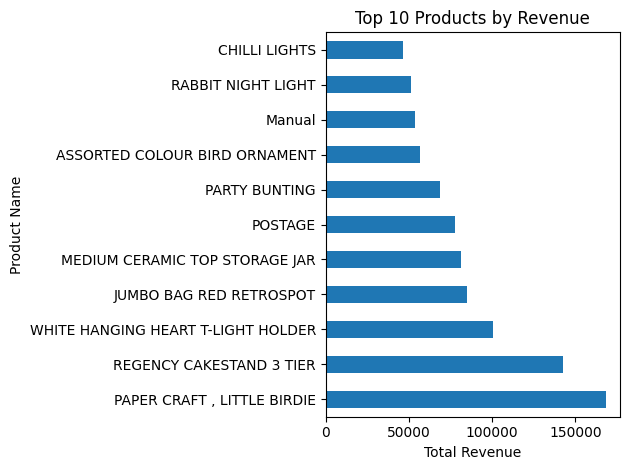

In [29]:
# Horizontal Bar Chart
df.groupby('Products')['TotalAmount'].sum().nlargest(11).plot(
    kind='barh',
    title='Top 10 Products by Revenue'
)
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

# Top 10 Countries by Revenue

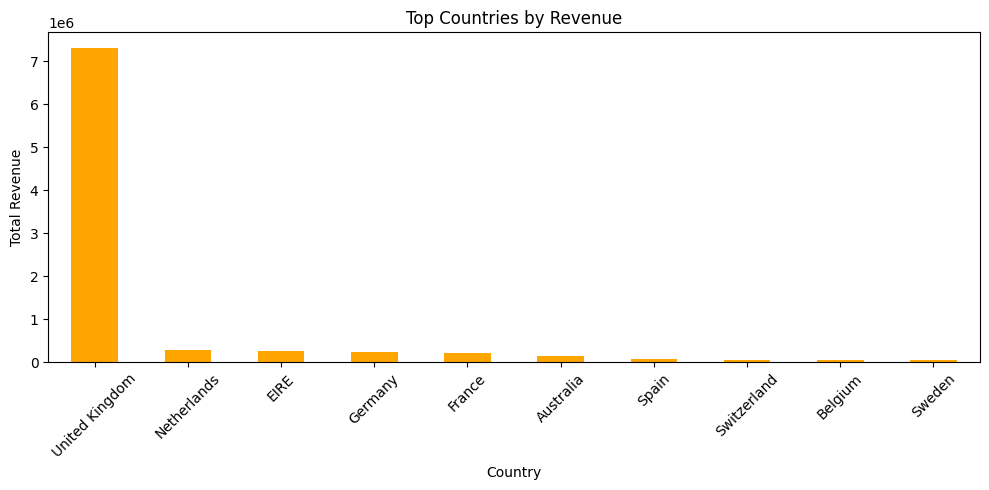

In [30]:
# Vertical Bar Chart
top_countries = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='orange')
plt.title('Top Countries by Revenue')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of purchase amounts

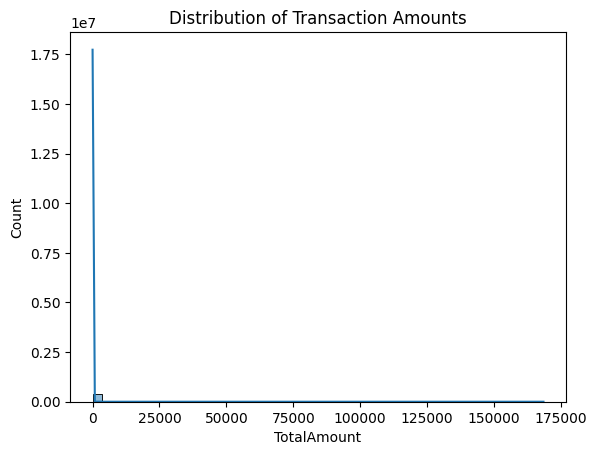

In [31]:
# Histogram With KDE
sns.histplot(df['TotalAmount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

# Relationship:Quantity vs UnitPrice

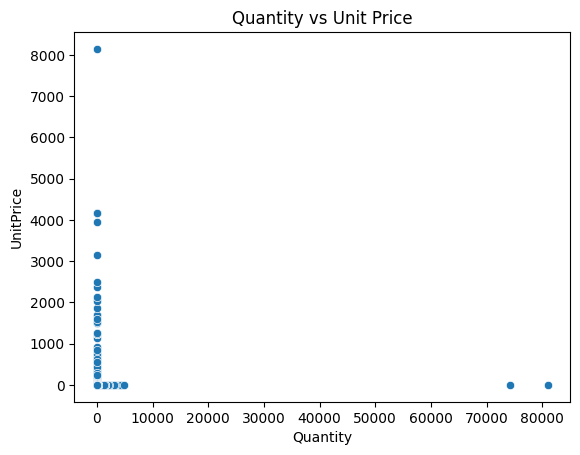

In [ ]:
# Scatter Plot
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title("Quantity vs Unit Price")
plt.show()

# Revenue by Months

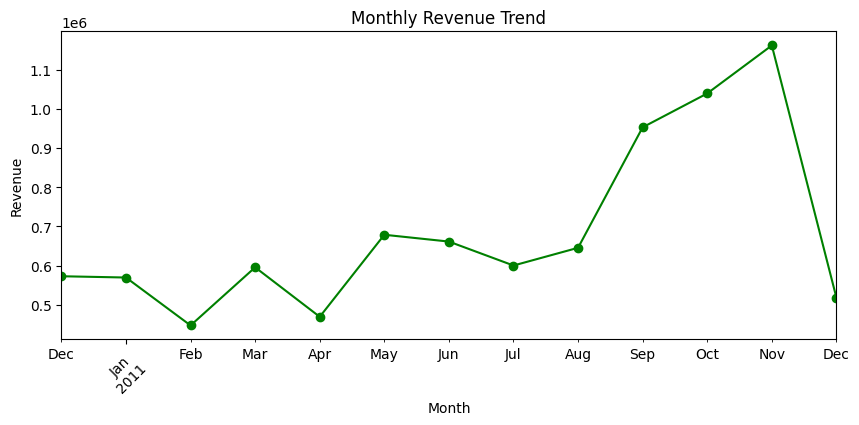

In [25]:
# Add month column
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Monthly revenue trend
monthly_sales = df.groupby('Month')['TotalAmount'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Revenue Trend', figsize=(10,4), color='green')
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()
